In [1]:
import face_alignment 
from skimage import io
from matplotlib import pyplot as plt
import numpy as np

fa = face_alignment.FaceAlignment(face_alignment.LandmarksType._2D, flip_input=False)


(-0.5, 799.5, 599.5, -0.5)

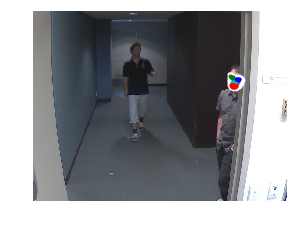

In [14]:
input = io.imread('/run/media/gpu/My Passport/chokepoint/frames/P1E_S1/P1E_S1_C1/00000233.jpg')
preds = fa.get_landmarks(input)
preds = preds[0]

#TODO: Make this nice
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(1, 2, 1)
ax.imshow(input)
ax.plot(preds[0:17,0],preds[0:17,1],marker='o',markersize=3,linestyle='',color='w',lw=2)
ax.plot(preds[17:22,0],preds[17:22,1],marker='o',markersize=3,linestyle='',color='w',lw=2)
ax.plot(preds[22:27,0],preds[22:27,1],marker='o',markersize=3,linestyle='',color='w',lw=2)
ax.plot(preds[27:31,0],preds[27:31,1],marker='o',markersize=3,linestyle='',color='c',lw=2)
ax.plot(preds[31:36,0],preds[31:36,1],marker='o',markersize=3,linestyle='',color='c',lw=2)
ax.plot(preds[36:42,0],preds[36:42,1],marker='o',markersize=3,linestyle='',color='g',lw=2)
ax.plot(preds[42:48,0],preds[42:48,1],marker='o',markersize=3,linestyle='',color='b',lw=2)
ax.plot(preds[48:60,0],preds[48:60,1],marker='o',markersize=3,linestyle='',color='r',lw=2)
ax.plot(preds[60:68,0],preds[60:68,1],marker='o',markersize=3,linestyle='',color='r',lw=2)
# ax.plot(np.mean(preds[48:60,0]), np.mean(preds[48:60,1]), marker='o',markersize=3,linestyle='',color='r',lw=2)
# ax.plot(np.mean(preds[36:42,0]), np.mean(preds[36:42,1]), marker='o',markersize=3,linestyle='',color='r',lw=2)
# ax.plot(np.mean(preds[42:48,0]), np.mean(preds[42:48,1]), marker='o',markersize=3,linestyle='',color='r',lw=2)
ax.axis('off')

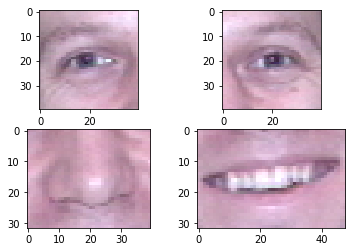

In [4]:
from PIL import Image
im = Image.fromarray(input)
left_eye = (np.mean(preds[36:42,0]),np.mean(preds[36:42,1]))
right_eye = (np.mean(preds[42:48,0]),np.mean(preds[42:48,1]))
nose = (np.mean(preds[27:36,0]),np.mean(preds[27:36,1]))
mouth = (np.mean(preds[48:68,0]),np.mean(preds[48:68,1]))
bound = 20
crop = im.crop((left_eye[0]-bound, left_eye[1]-bound, left_eye[0]+bound, left_eye[1]+bound))
# crop = crop.resize((128, 128))
plt.subplot(221)
plt.imshow(crop)
crop = im.crop((right_eye[0]-bound, right_eye[1]-bound, right_eye[0]+bound, right_eye[1]+bound))
plt.subplot(222)
plt.imshow(crop)
crop = im.crop((nose[0] - bound, nose[1] - bound + 4, nose[0] + bound, nose[1] + bound - 4))
plt.subplot(223)
plt.imshow(crop)
# bound += 7
crop = im.crop((mouth[0] - bound - 4, mouth[1] - bound + 4, mouth[0] + bound + 4, mouth[1] + bound - 4))
plt.subplot(224)
plt.imshow(crop)
# crop = im.crop((preds[0,0]-15, preds[24,1] -30 , preds[16,0]+15 , preds[8,1] ))
# crop.resize((128,128))
# plt.imshow(crop)
# 